<a href="https://colab.research.google.com/github/sebasruggero/python/blob/main/SpeechToText_Statics_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

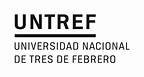


## Lic. Sebastian Ruggero
### Maestrando Maestria en Análisis y Generación de Análisis Estadistico
#### Tema de Análisis: Speech to Text and Text Analytics




<h1>Este trabajo tiene como objetivo aplicar tecnicas de analisis estadisticos para realizar Text Analytics</h1>

## [Text Mining Infrastructure in R](https://www.researchgate.net/publication/26539008_Text_Mining_Infrastructure_in_R)

<h2>El algoritmo incluye los siguietes pasos:</h2>


1- Configuracion de libreria OpenaAi para realizar el analisis utilizando  [ChatGPT and Whisper APIs ](https://openai.com/blog/introducing-chatgpt-and-whisper-apis)

Fine Tuning? con pappers de text analytics?

2- Conversion de audio a texto mediante el uso de la API

3 - Preparacion del entorno para realizar el analisis utilizando lenguaje R

3.1 Instalacion de bibliotecas [tm](https://www.rdocumentation.org/packages/tm/versions/0.7-11), [tidytext](https://www.rdocumentation.org/packages/tidytext/versions/0.4.1), [worldcloud2](https://r-graph-gallery.com/196-the-wordcloud2-library.html), [dplyr](https://dplyr.tidyverse.org/), [ggplot2](https://ggplot2.tidyverse.org/), [stringr](https://www.rdocumentation.org/packages/stringr/versions/1.5.0), [tydiverse](https://www.tidyverse.org/), [syuzhet](https://www.rdocumentation.org/packages/syuzhet/versions/1.0.6), [textdata](https://www.rdocumentation.org/packages/textdata/versions/0.4.4)

4. Carga de bibliotecas

5. Carga de datos 

6. Limpieza de texto

7. Conversión de texto a minusculas

8. Eliminar palabras vacías

9. Sentimientos: Analisis y Visualización

10. Nube de Palabras

11. Frecuencia de Palabras

12. Biagramas: Analisis y Visualizacion

13. Detección de temas

14. Grafico de Rede de palabras





1- Configuracion de libreria OpenaAi para realizar el analisis utilizando  [ChatGPT and Whisper APIs ](https://openai.com/blog/introducing-chatgpt-and-whisper-apis)

Instalamos la version de prueba ( 30 segundos)


In [142]:
!pip install git+https://github.com/openai/whisper.git 
!sudo apt update && sudo apt install ffmpeg


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-t5q9o16g
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-t5q9o16g
  Resolved https://github.com/openai/whisper.git to commit 248b6cb124225dd263bb9bd32d060b6517e067f8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ub

In [146]:
!whisper "file.mp3" --model small 

/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
Detecting language using up to the first 30 seconds. Use `--language` to specify the language
Detected language: Spanish
[00:00.000 --> 00:04.200]  A ver, Argentina no es que no crece desde ahora, o sea, yo tengo todas las críticas
[00:04.200 --> 00:07.000]  hacia este gobierno y, digamos, me parece espantoso, ¿sí?
[00:07.000 --> 00:09.000]  Pero el problema del crecimiento argentino no viene a hoy.
[00:09.000 --> 00:12.000]  A ver, Argentina no crece desde 2011.
[00:12.000 --> 00:17.000]  En ese lapso, 2011-2018, el mundo creció 34%.
[00:17.000 --> 00:21.000]  Los países desarrollados 17 y los emergentes 45, no son nada.
[00:21.000 --> 00:23.000]  ¿Y cuál es su propuesta?
[00:23.000 --> 00:27.000]  Mi propuesta, básicamente lo que hay que hacer es una reforma del Estado.
[00:27.000 --> 00:31

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import webvtt
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [148]:
!pip install webvtt-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [149]:
# Paso 1: Cargar las bibliotecas necesarias
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [152]:
# Paso 2: Cargar los datos
subtitulos = webvtt.read('/content/file.vtt')

In [153]:
# Cargar archivo VTT
subtitulos = webvtt.read('/content/file.vtt')  # Reemplaza "ruta/archivo.vtt" con la ubicación y el nombre de tu archivo VTT

# Crear una lista de diccionarios para almacenar los datos de los subtítulos
data = []
for subtitulo in subtitulos:
    data.append({'time': subtitulo.start, 'subtitulo': subtitulo.text})

# Crear DataFrame
df = pd.DataFrame(data)

# Mostrar DataFrame
print(df)

            time                                          subtitulo
0   00:00:00.000  A ver, Argentina no es que no crece desde ahor...
1   00:00:04.200  hacia este gobierno y, digamos, me parece espa...
2   00:00:07.000  Pero el problema del crecimiento argentino no ...
3   00:00:09.000              A ver, Argentina no crece desde 2011.
4   00:00:12.000      En ese lapso, 2011-2018, el mundo creció 34%.
..           ...                                                ...
89  00:03:22.000     Cuando eliminase la posibilidad de la corrida,
90  00:03:24.000            ya no necesitas tener el Banco Central.
91  00:03:26.000     El fundamento para que exista un Banco Central
92  00:03:28.000  es para que se apresta a mí este último instan...
93  00:03:30.000  Si eliminase el problema, no tenemos más probl...

[94 rows x 2 columns]


In [154]:
# Cargar archivo VTT
subtitulos = webvtt.read('/content/file.vtt')   # Reemplaza "ruta/archivo.vtt" con la ubicación y el nombre de tu archivo VTT

# Obtener texto plano sin los tiempos de los subtítulos
texto_plano = '\n'.join(subtitulo.text for subtitulo in subtitulos)

# Mostrar texto plano
print(texto_plano)

A ver, Argentina no es que no crece desde ahora, o sea, yo tengo todas las críticas
hacia este gobierno y, digamos, me parece espantoso, ¿sí?
Pero el problema del crecimiento argentino no viene a hoy.
A ver, Argentina no crece desde 2011.
En ese lapso, 2011-2018, el mundo creció 34%.
Los países desarrollados 17 y los emergentes 45, no son nada.
¿Y cuál es su propuesta?
Mi propuesta, básicamente lo que hay que hacer es una reforma del Estado.
Esto lo estamos publicando el mes que viene con Diego Yacomini.
Básicamente consta en bajar 15 puntos el gasto público
para bajar 10 puntos la presión fiscal,
quitar presión sobre la esferta de la economía
para que la economía vuelva a crecer
y, en el plano monetario, para eliminar la inflación directamente,
hacer volar el Banco Central.
Gasto público es una categoría grande.
¿De dónde sacas, puntualmente?
¿Perdón? ¿Hacer volar el Banco Central qué significa?
Eliminarlo.
¿Hay algún país desarrollado que no tenga Banco Central?
La pregunta es, a ver

In [162]:
# Paso 3: Limpieza de texto

# Pasamos el texto a minusculas
texto_minusculas = texto_plano.lower()

In [163]:
# Definimos las stopwords en el idioma correspondiente
stopwords_es = set(stopwords.words('spanish'))

In [196]:
# Eliminar palabras vacías
stopwords_es = stopwords.words('spanish')
palabras_a_eliminar = [",", "que", "y", "otras", "¿", "?", ".", "...", "si","vos", "entonces", "va"]


In [197]:
# Tokenización del texto
palabras = nltk.word_tokenize(texto_minusculas)

In [198]:
# Eliminacion de stopwords
texto_sin_stopwords = [palabra for palabra in palabras if palabra.lower() not in stopwords_es and palabra not in palabras_a_eliminar]


In [199]:
texto_procesado = ' '. join(texto_sin_stopwords)

In [200]:
texto_procesado

'ver argentina crece ahora todas críticas hacia gobierno digamos parece espantoso ¿sí problema crecimiento argentino viene hoy ver argentina crece 2011. lapso 2011-2018 mundo creció 34 % países desarrollados 17 emergentes 45 ¿y cuál propuesta propuesta básicamente hacer reforma publicando mes viene diego yacomini básicamente consta bajar 15 puntos gasto público bajar 10 puntos presión fiscal quitar presión esferta economía economía vuelva crecer plano monetario eliminar inflación directamente hacer volar banco central gasto público categoría grande ¿de dónde sacas puntualmente ¿perdón ¿hacer volar banco central significa eliminarlo ¿hay algún país desarrollado banco central pregunta ver ¿cómo historia banco central argentina argentina banco central 1935. cajero argentina banco central acá ¿cuánto inflación 3 % después banco central mixto bueno 1935 existía control remoto ¿no bien existía televisión ver digamos ver dinero invento privado dinero pasó manos políticos convirtió mecanismo e

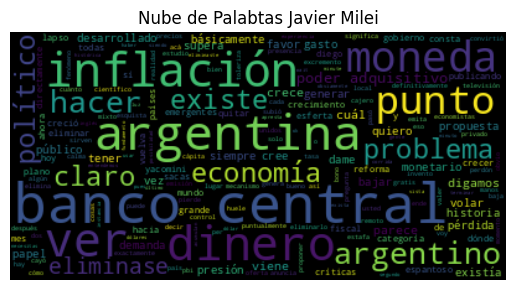

In [204]:
# Paso 5: Creación de nube de palabras
wordcloud = WordCloud().generate(texto_procesado)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabtas Javier Milei')
plt.show()

In [203]:
import plotly.express as px
import pandas as pd
from collections import Counter

# Dividir el texto en palabras
palabras = texto_procesado.split()

# Contar la frecuencia de las palabras
frecuencia_palabras = Counter(palabras)

# Ordenar las palabras por frecuencia de mayor a menor
palabras_ordenadas = sorted(frecuencia_palabras, key=frecuencia_palabras.get, reverse=True)

# Crear un DataFrame con las palabras y sus frecuencias acumuladas
df = pd.DataFrame({'Palabra': palabras_ordenadas, 'Frecuencia': [frecuencia_palabras[palabra] for palabra in palabras_ordenadas]})

# Crear el gráfico utilizando Plotly
fig = px.bar(df, x='Palabra', y='Frecuencia', title='Histograma de Palabras y Frecuencia Acumulada',
             labels={'Frecuencia': 'Frecuencia', 'Palabra': 'Palabras'})
fig.update_yaxes(title_text='Frecuencia Acumulada', secondary_y=True)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [208]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [209]:
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


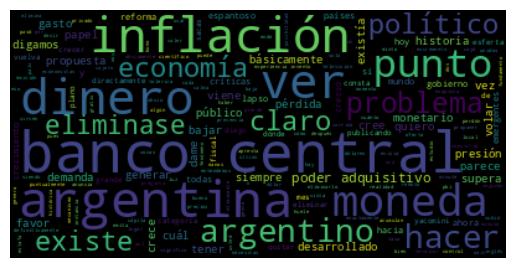

In [237]:
# Start with one review:

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(texto_procesado)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



In [217]:
wine_mask = np.array(Image.open('/content/logo_milei.png'))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [218]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val


In [219]:
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

In [220]:
# Check the expected result of your mask
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

In [202]:
# Paso 6: Análisis adicional - Frecuencia de palabras
palabras = texto_procesado.split()

# Contar la frecuencia de las palabras
frecuencia_palabras = Counter(palabras)

# Obtener las palabras y sus frecuencias en listas separadas
palabras = list(frecuencia_palabras.keys())
frecuencias = list(frecuencia_palabras.values())